## SugarCRM ICP Analysis Using Logistic Regression

Performed by:

Ken Wood

Marketing Data Scientist

SugarCRM

kwood@sugarcrm.com

(919) 802-0065



### Mount the Google Drive where the data files are located.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Load the necessary Python software packages to perform the logistic regression...

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Load the 'opp_data' file from location *''/content/drive/My Drive/Colab Notebooks/SugarCRM ICP Analysis/'* and develop some summary statistics.

## Input (independent) variables

1.   **Opportunity Creation Date**
2.   **Qualified Sales Opportunity Date**
3. **Aging Date Modified** 
4. **Opportunity Date Modified** 
5. **Aging Date Created** 
6. **Opportunity Name** 
7. **# of Employees**
8. **# of Employees Group 1** (categorical: “10-100”, “100-1000”, "1000+")
9.  **# of Employees Group 2** (categorical: “0-100”, “100-1000”, "1000+")
10. **Opportunity Type** (categorical: "New"”, “Additional”, “Upgrade”)
11. **Industry**
12. **Industry Code** 
13. **Region**
14. **Region Code** (categorical: "APAC", "NAM", "EMEA", "LATAM")
15. **Customer Full Name** 
16. **Opportunity ID** 
17. **Sales Stage - Before Value**
18.**Sales Stage - After Value**
19.**Sales Stage**
20. **Last Sales Stage 1** 
21. **Last Sales Stage 2** 
22. **Last Sales Stage 3** 
23. **Revenue Line Item Coded** (SugarCRM product)
24. **Time in Previous Value**
25. **Time Since Creation**
26. **Gross ARR** (Gross Annual Recurring Revenue)
27. **Net ARR** (Net Annual Recurring Revenue)

## Dependent variable (desired target):

28. **Converted?** (binary variable: 1 = "Yes", 0 = "No")



In [3]:
date_columns = ["Opportunity Creation Date","Qualified Sales Opportunity Date","Aging Date Modified","Opportunity Date Modified","Aging Date Created"]
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SugarCRM ICP Analysis/opp_data.csv',parse_dates=date_columns)
df["Gross ARR"] = df["Gross ARR"].astype(float)
df["Net ARR"] = df["Net ARR"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41324 entries, 0 to 41323
Data columns (total 27 columns):
Opportunity Creation Date           41324 non-null datetime64[ns]
Qualified Sales Opportunity Date    40056 non-null datetime64[ns]
Aging Date Modified                 41324 non-null datetime64[ns]
Opportunity Date Modified           41324 non-null datetime64[ns]
Aging Date Created                  41324 non-null datetime64[ns]
Opportunity Name                    41324 non-null object
# of Employees Group                41324 non-null object
Opportunity Type                    41324 non-null object
Industry                            21047 non-null object
Meta Industry                       41324 non-null object
Region                              41324 non-null object
Region Code                         41324 non-null object
Full Name                           41318 non-null object
ID                                  41324 non-null object
Before Value                        311

### Let's now do some data exploration!

In [4]:
print("Shape of dataframe: ",df.shape,"\n")             # Get shape of dataframe.
print(df.head())                                        # Print first 5 rows of dataframe.
print(df.describe())                                    # Get some summary stats on the numeric variables

Shape of dataframe:  (41324, 27) 

  Opportunity Creation Date  ... Converted?
0                2018-01-01  ...          1
1                2018-01-01  ...          1
2                2018-01-01  ...          1
3                2018-01-01  ...          1
4                2018-01-01  ...          1

[5 rows x 27 columns]
       Time In Previous Value  Time Since Creation  ...       Net ARR    Converted?
count            41324.000000         41324.000000  ...  4.132400e+04  41324.000000
mean                20.736545            32.059965  ...  1.281923e+04      0.488602
std                 53.176901            64.297108  ...  7.759103e+04      0.499876
min                  0.000000             0.000000  ...  0.000000e+00      0.000000
25%                  0.000000             0.000000  ...  1.629600e+03      0.000000
50%                  0.000000             1.000000  ...  4.680000e+03      0.000000
75%                 11.000000            34.000000  ...  7.800000e+03      1.000000
max   

In [5]:
zeros,ones = df['Converted?'].value_counts()
print('numzeros: ',zeros,'numones: ',ones)
print('Percentage of opportunities that converted:', round((ones*100)/(zeros+ones),1),'%')
print('Percentage of opportunities that did not convert:', round((zeros*100)/(zeros+ones),1),'%')

numzeros:  21133 numones:  20191
Percentage of opportunities that converted: 48.9 %
Percentage of opportunities that did not convert: 51.1 %


### Plot the number of ones and zeros.

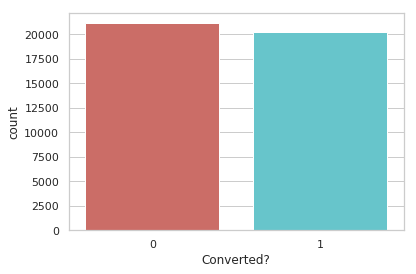

In [6]:
sns.countplot(x=df['Converted?'],palette='hls')

In [7]:
df.groupby('Converted?').mean()

,Time In Previous Value,Time Since Creation,Gross ARR,Net ARR
Converted?,,,,
0,28.348176,45.711636,23650.471385,19231.776509
1,12.769798,17.771383,7938.977821,6107.506398


### Conclusion: mean Gross ARR is a good predictor of conversion.




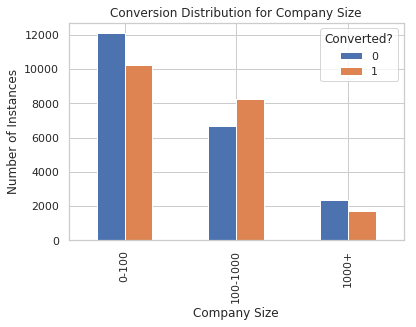

In [8]:
pd.crosstab(df['# of Employees Group'],df['Converted?']).plot(kind='bar')
plt.title('Conversion Distribution for Company Size')
plt.xlabel('Company Size')
plt.ylabel('Number of Instances')
plt.savefig('pur_fre_month_bar')

### Conclusion:  'Company Size' does not appear to be a good predictor of conversion.

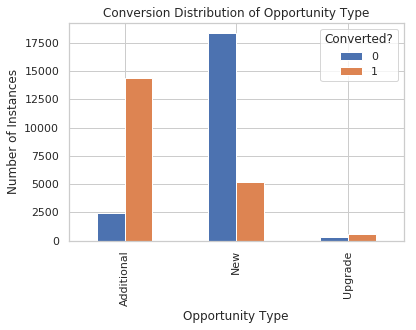

In [9]:
pd.crosstab(df['Opportunity Type'],df['Converted?']).plot(kind='bar')
plt.title('Conversion Distribution of Opportunity Type')
plt.xlabel('Opportunity Type')
plt.ylabel('Number of Instances')
plt.savefig('pur_fre_pout_bar')

### Conclusion:  'Opportunity Type' appears to be a good predictor of conversion.

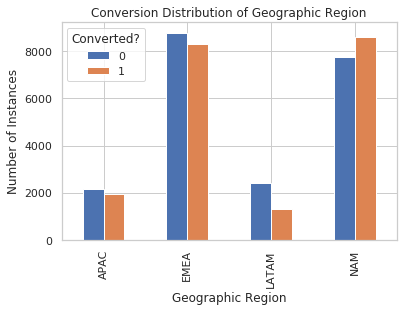

In [10]:
pd.crosstab(df['Region Code'],df['Converted?']).plot(kind='bar')
plt.title('Conversion Distribution of Geographic Region')
plt.xlabel('Geographic Region')
plt.ylabel('Number of Instances')
plt.savefig('pur_fre_pout_bar')

### Conclusion:  Geographic region does not appear to be a good predictor of conversion.

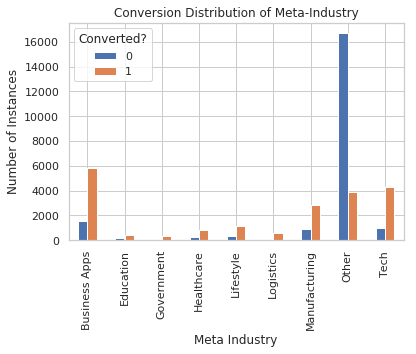

In [11]:
pd.crosstab(df['Meta Industry'],df['Converted?']).plot(kind='bar')
plt.title('Conversion Distribution of Meta-Industry')
plt.xlabel('Meta Industry')
plt.ylabel('Number of Instances')
plt.savefig('pur_fre_pout_bar')

### Conclusion:  Meta industry does appears to be a fair predictor of conversion.

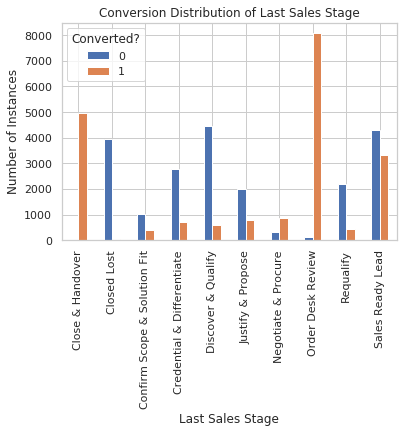

In [12]:
pd.crosstab(df['Last Sales Stage 3'],df['Converted?']).plot(kind='bar')
plt.title('Conversion Distribution of Last Sales Stage')
plt.xlabel('Last Sales Stage')
plt.ylabel('Number of Instances')
plt.savefig('pur_fre_pout_bar')

### Conclusion:  Last Sales Stage does appear to be a good predictor of conversion.

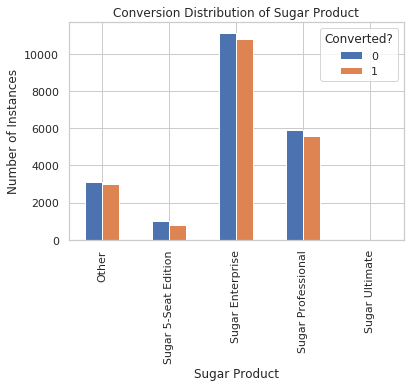

In [13]:
pd.crosstab(df['Revenue Line Item Coded'],df['Converted?']).plot(kind='bar')
plt.title('Conversion Distribution of Sugar Product')
plt.xlabel('Sugar Product')
plt.ylabel('Number of Instances')
plt.savefig('pur_fre_pout_bar')

### Conclusion:  Sugar Product selection does not appear to be a good predictor of conversion.

### Let's delete the variables that will not be a part of our analysis.  For clarity, these variables are:


1.   'Opportunity Creation Date'
2.   'Qualified Sales Opportunity Date'
3.   'Aging Date Modified'
4.   'Opportunity Date Modified'
5.   'Aging Date Created'
6.   'Opportunity Name'
7.   'Industry'
8.   'Region'
9.   'Full Name'
10. 'ID'
11. 'Before Value'
12. 'After Value'
13. 'Sales Stage'
14. 'Last Sales Stage 1'
15. 'Last Sales Stage 2'
16. 'Revenue Line Item'
17. 'Time in Previous Value'
18. 'Time Since Creation'





In [0]:
df=df.drop(['Opportunity Creation Date','Qualified Sales Opportunity Date','Aging Date Modified','Opportunity Date Modified','Aging Date Created', 'Opportunity Name', 'Industry','Region','Full Name', 'ID','Before Value','After Value','Sales Stage','Last Sales Stage 1', 'Last Sales Stage 2','Revenue Line Item','Time In Previous Value','Time Since Creation'],axis=1)

### Now, we need to create dummy variables for: 


1.   '# of Employees Group'
2.   'Opportunity Type'
3.  'Meta Industry'
4. 'Region Code'
5. 'Last Sales Stage 3'
6. 'Revenue Line Item Coded'

### These variables will only take on  values of '0' or '1'.



In [15]:
df_vars=df.columns.values.tolist()
df_vars

['# of Employees Group',
 'Opportunity Type',
 'Meta Industry',
 'Region Code',
 'Last Sales Stage 3',
 'Revenue Line Item Coded',
 'Gross ARR',
 'Net ARR',
 'Converted?']

In [0]:
cat_vars=['# of Employees Group','Opportunity Type','Meta Industry','Region Code','Last Sales Stage 3','Revenue Line Item Coded']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1

In [0]:
df_vars=df.columns.values.tolist()
cat_vars=['# of Employees Group','Opportunity Type','Meta Industry','Region Code','Last Sales Stage 3','Revenue Line Item Coded']
to_keep=[i for i in df_vars if i not in cat_vars]

The final list of variables will be:

In [18]:
df_final=df[to_keep]
df_final.columns.values

array(['Gross ARR', 'Net ARR', 'Converted?', '# of Employees Group_0-100',
       '# of Employees Group_100-1000', '# of Employees Group_1000+',
       'Opportunity Type_Additional', 'Opportunity Type_New',
       'Opportunity Type_Upgrade', 'Meta Industry_Business Apps',
       'Meta Industry_Education', 'Meta Industry_Government',
       'Meta Industry_Healthcare', 'Meta Industry_Lifestyle',
       'Meta Industry_Logistics', 'Meta Industry_Manufacturing',
       'Meta Industry_Other', 'Meta Industry_Tech', 'Region Code_APAC',
       'Region Code_EMEA', 'Region Code_LATAM', 'Region Code_NAM',
       'Last Sales Stage 3_Close & Handover',
       'Last Sales Stage 3_Closed Lost',
       'Last Sales Stage 3_Confirm Scope & Solution Fit',
       'Last Sales Stage 3_Credential & Differentiate',
       'Last Sales Stage 3_Discover & Qualify',
       'Last Sales Stage 3_Justify & Propose',
       'Last Sales Stage 3_Negotiate & Procure',
       'Last Sales Stage 3_Order Desk Review',
       

In [19]:
df_final.head()

,Gross ARR,Net ARR,Converted?,# of Employees Group_0-100,# of Employees Group_100-1000,# of Employees Group_1000+,Opportunity Type_Additional,Opportunity Type_New,Opportunity Type_Upgrade,Meta Industry_Business Apps,Meta Industry_Education,Meta Industry_Government,Meta Industry_Healthcare,Meta Industry_Lifestyle,Meta Industry_Logistics,Meta Industry_Manufacturing,Meta Industry_Other,Meta Industry_Tech,Region Code_APAC,Region Code_EMEA,Region Code_LATAM,Region Code_NAM,Last Sales Stage 3_Close & Handover,Last Sales Stage 3_Closed Lost,Last Sales Stage 3_Confirm Scope & Solution Fit,Last Sales Stage 3_Credential & Differentiate,Last Sales Stage 3_Discover & Qualify,Last Sales Stage 3_Justify & Propose,Last Sales Stage 3_Negotiate & Procure,Last Sales Stage 3_Order Desk Review,Last Sales Stage 3_Requalify,Last Sales Stage 3_Sales Ready Lead,Revenue Line Item Coded_Other,Revenue Line Item Coded_Sugar 5-Seat Edition,Revenue Line Item Coded_Sugar Enterprise,Revenue Line Item Coded_Sugar Professional,Revenue Line Item Coded_Sugar Ultimate
0,4560.0,2964.0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,4560.0,2964.0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,4560.0,2964.0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4560.0,2964.0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,4560.0,2964.0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


### Separate the 'X' matrix and 'y' output vector.

In [0]:
X = df_final.loc[:, df_final.columns != 'Converted?']
X = pd.DataFrame(X)
y = df_final.loc[:, df_final.columns == 'Converted?']
y = pd.DataFrame(y)

### Feature selection is a process where one automatically selects those features in in a dataset that contribute most to the prediction variable or output in which one are interested. Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [21]:
df_final_vars=df_final.columns.values.tolist()
# y=['Converted?']
# X=[i for i in df_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')            # create a base logistic regression classifier used to evaluate a subset of attributes
selector = RFE(logreg, 5, step=1)                      # create the RFE model and select 5 attributes
selector = selector.fit(X, y)                          # summarize the selection of the attributes
print(selector.support_)
print(selector.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True False False False False  True  True False False False False False
 False False False  True False False False False False False False False
 False False False False  True False False False False False False False]
[ 1 32 20  7 28  1  1 25  3 26 27 18 14 21  9  1  4 29 13 16  8  2  5 23
 11  6 15 19  1 12 24 22 30 10 17 31]


### The RFE has helped us select the following features: “Gross ARR”, "# of Employees_1000+'', “Opportunity Type_Additional”, “Meta Industry_Manufacturing”, 'Last Sales Stage 3_Order Desk Review'.

In [0]:
cols=['Gross ARR', '# of Employees Group_1000+', 'Opportunity Type_Additional','Meta Industry_Manufacturing','Last Sales Stage 3_Order Desk Review'] 
X = X[cols]

### Separate 'X' and 'y' into train and test sets.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Now, we implement the Logistic Regression model.

In [24]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.476066
         Iterations 9
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.313     
Dependent Variable:         Converted?             AIC:                    27551.3505
Date:                       2019-06-05 14:45       BIC:                    27592.7130
No. Observations:           28926                  Log-Likelihood:         -13771.   
Df Model:                   4                      LL-Null:                -20042.   
Df Residuals:               28921                  LLR p-value:            0.0000    
Converged:                  1.0000                 Scale:                  1.0000    
No. Iterations:             9.0000                                                   
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z     P>|z|   [0.

### The p-values for most of the variables are smaller than 0.05, except for 'Gross ARR' and 'Net ARR', therefore, we will remove them.

In [25]:
cols=['Gross ARR','# of Employees Group_1000+','Opportunity Type_Additional','Meta Industry_Manufacturing','Last Sales Stage 3_Order Desk Review'] 
X_train = X_train[cols]

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.476066
         Iterations 9
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.313     
Dependent Variable:         Converted?             AIC:                    27551.3505
Date:                       2019-06-05 14:45       BIC:                    27592.7130
No. Observations:           28926                  Log-Likelihood:         -13771.   
Df Model:                   4                      LL-Null:                -20042.   
Df Residuals:               28921                  LLR p-value:            0.0000    
Converged:                  1.0000                 Scale:                  1.0000    
No. Iterations:             9.0000                                                   
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z     P>|z|   [0.

### Logistic Regression model fitting...

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Now, we predict how the test set performs and calculate the accuracy.

In [27]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


### Determine the elements of the 'Confusion' matrix.

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4061 2265]
 [ 599 5473]]


### The Confusion matrix tells us that we have 4061+5473 = 9534 correct predictions and 599+2265 = 2864 incorrect predictions.  Now, we compute the precision, recall, F-measure and support metrics.

The **precision is the ratio tp / (tp + fp)** where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
The **recall is the ratio tp / (tp + fn)** where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The **F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.**
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The **support is the number of occurrences of each class in y_test**.

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.64      0.74      6326
           1       0.71      0.90      0.79      6072

    accuracy                           0.77     12398
   macro avg       0.79      0.77      0.77     12398
weighted avg       0.79      0.77      0.77     12398



### Interpretation:  Of the entire test set, 77% of the opportunity conversions were influenced by the variables:


*   '# of Employees Group_1000+'
*   'Opportunity Type_Additional'
*  'Meta Industry_Manufacturing'
*   'Last Sales Stage 3_Order Desk Review'





### Receiver Operating Characteristic (ROC) Curve

### The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

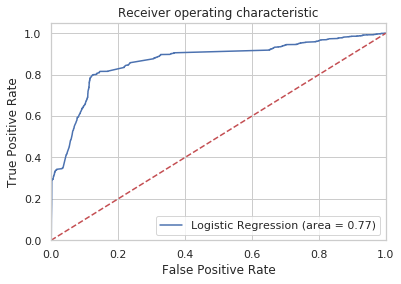

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()